Generated raw data with shape: (240, 5)

--- Part 1: Data Inspection and Pre-processing ---
Visualizing raw data to identify bias...


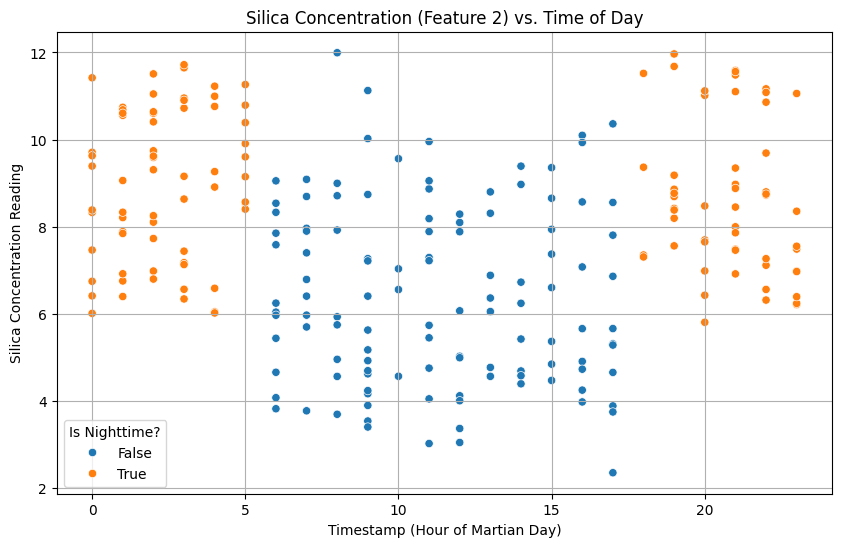

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

# --- Data Generation ---
# This function is provided for you. Do not modify it.
def generate_mars_data():
    """
    Generates a synthetic Mars rover dataset.

    - 3 true Gaussian clusters (rock types).
    - Feature at index 2 (silica) is biased upwards by +2.5 for
      readings taken at night (18:00-06:00).
    - ~5% of the data are random outliers from ChemCam "misfires".

    Returns:
        tuple: (data, timestamps)
               - data (np.ndarray): A (250, 5) numpy array.
               - timestamps (np.ndarray): A (250,) array of hours (0-23).
    """
    np.random.seed(42)

    # Define the true clusters
    means = [
        [5.1, 3.5, 4.4, 1.2, 1.1], # Igneous
        [8.5, 3.0, 8.5, 3.8, 2.3], # Sedimentary
        [6.8, 2.7, 6.1, 2.2, 1.5]  # Altered by Water
    ]
    covs = [
        np.diag([0.3, 0.4, 0.5, 0.3, 0.2]),
        np.diag([0.5, 0.3, 0.6, 0.4, 0.4]),
        np.diag([0.4, 0.3, 0.5, 0.3, 0.3])
    ]

    n_samples_per_cluster = 75

    # Generate true data
    true_data = np.vstack([np.random.multivariate_normal(m, c, n_samples_per_cluster) for m, c in zip(means, covs)])

    # Add outliers
    n_outliers = 15
    outliers = np.random.uniform(low=0, high=12, size=(n_outliers, 5))

    # Combine true data and outliers
    data = np.vstack([true_data, outliers])

    # Generate timestamps and apply conditional bias
    n_total = data.shape[0]
    timestamps = np.random.randint(0, 24, n_total)

    # Apply bias to silica reading (feature 2) for nighttime readings
    night_mask = (timestamps >= 18) | (timestamps < 6)
    data[night_mask, 2] += 2.5 # Additive bias

    # Shuffle everything
    shuffle_idx = np.random.permutation(n_total)
    data = data[shuffle_idx]
    timestamps = timestamps[shuffle_idx]

    return data, timestamps


raw_data, timestamps = generate_mars_data()
print(f"Generated raw data with shape: {raw_data.shape}")

print("\n--- Part 1: Data Inspection and Pre-processing ---")

# Part 1 - Task 1: Generate and Inspect the Data (provided for you)
print("Visualizing raw data to identify bias...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=timestamps, y=raw_data[:, 2], hue=(timestamps >= 18) | (timestamps < 6))
plt.title("Silica Concentration (Feature 2) vs. Time of Day")
plt.xlabel("Timestamp (Hour of Martian Day)")
plt.ylabel("Silica Concentration Reading")
plt.legend(title="Is Nighttime?")
plt.grid(True)
plt.show()


Generated raw data with shape: (240, 5)

--- Part 1 - Task 2: Correct for Systematic Bias (5 points) ---
Visualizing silica data before correction...


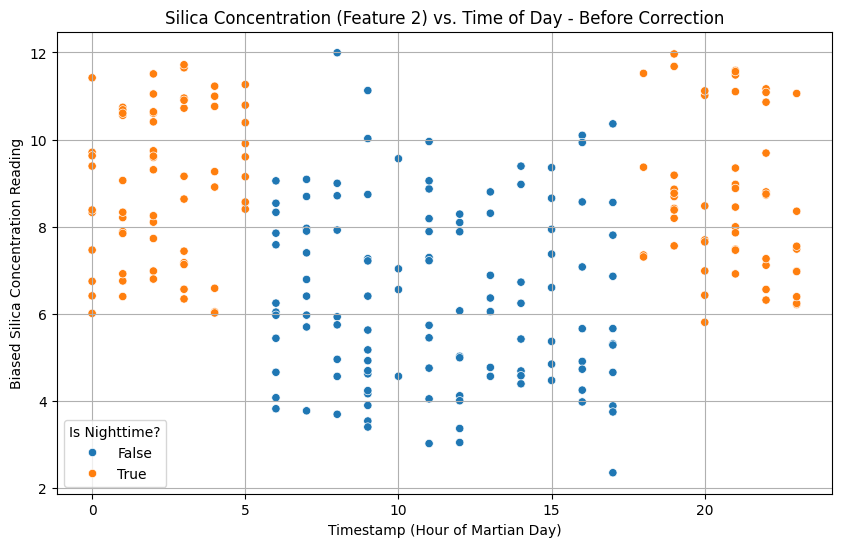

Visualizing silica data after correction...


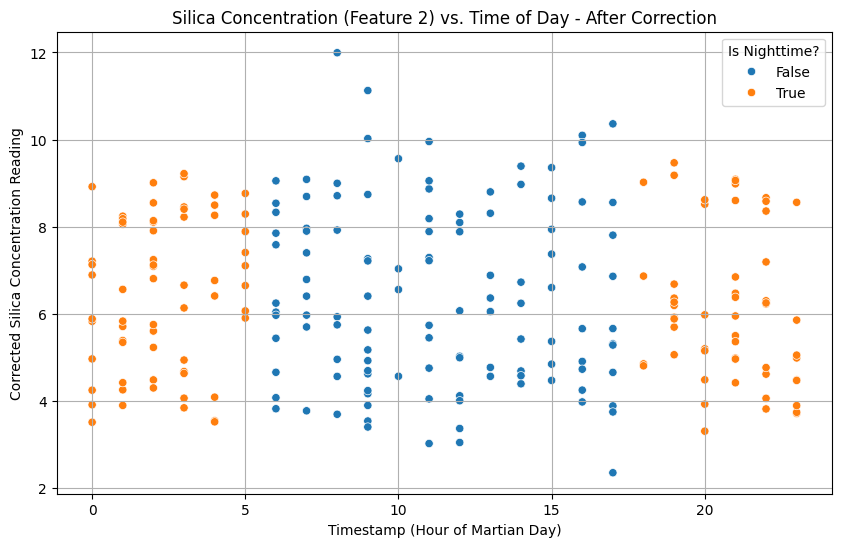

In [6]:
# Part 1 - Task 2: Correct for Systematic Bias (5 points)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

# --- Data Generation ---
# This function is provided for you. Do not modify it.
def generate_mars_data():
    """
    Generates a synthetic Mars rover dataset.

    - 3 true Gaussian clusters (rock types).
    - Feature at index 2 (silica) is biased upwards by +2.5 for
      readings taken at night (18:00-06:00).
    - ~5% of the data are random outliers from ChemCam "misfires".

    Returns:
        tuple: (data, timestamps)
               - data (np.ndarray): A (250, 5) numpy array.
               - timestamps (np.ndarray): A (250,) array of hours (0-23).
    """
    np.random.seed(42)

    # Define the true clusters
    means = [
        [5.1, 3.5, 4.4, 1.2, 1.1], # Igneous
        [8.5, 3.0, 8.5, 3.8, 2.3], # Sedimentary
        [6.8, 2.7, 6.1, 2.2, 1.5]  # Altered by Water
    ]
    covs = [
        np.diag([0.3, 0.4, 0.5, 0.3, 0.2]),
        np.diag([0.5, 0.3, 0.6, 0.4, 0.4]),
        np.diag([0.4, 0.3, 0.5, 0.3, 0.3])
    ]

    n_samples_per_cluster = 75

    # Generate true data
    true_data = np.vstack([np.random.multivariate_normal(m, c, n_samples_per_cluster) for m, c in zip(means, covs)])

    # Add outliers
    n_outliers = 15
    outliers = np.random.uniform(low=0, high=12, size=(n_outliers, 5))

    # Combine true data and outliers
    data = np.vstack([true_data, outliers])

    # Generate timestamps and apply conditional bias
    n_total = data.shape[0]
    timestamps = np.random.randint(0, 24, n_total)

    # Apply bias to silica reading (feature 2) for nighttime readings
    night_mask = (timestamps >= 18) | (timestamps < 6)
    data[night_mask, 2] += 2.5 # Additive bias

    # Shuffle everything
    shuffle_idx = np.random.permutation(n_total)
    data = data[shuffle_idx]
    timestamps = timestamps[shuffle_idx]

    return data, timestamps


raw_data, timestamps = generate_mars_data()
print(f"Generated raw data with shape: {raw_data.shape}")

print("\n--- Part 1 - Task 2: Correct for Systematic Bias (5 points) ---")

# Part 1 - Task 2: Correct for Systematic Bias (5 points)
#initialize corrected raw data as a copy of biased raw data
corrected_data = raw_data.copy()
#iterate raw data and timestamps to soustract the additive bias of 2.5 to feature 2 (silica) for nighttime readings
for i in range(len(corrected_data)):
    if (timestamps[i] >= 18) or (timestamps[i] < 6):
        corrected_data[i, 2] -= 2.5

# Visualize the data before and after correction
# before correction
print("Visualizing silica data before correction...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=timestamps, y=raw_data[:, 2], hue=(timestamps >= 18) | (timestamps < 6))
plt.title("Silica Concentration (Feature 2) vs. Time of Day - Before Correction")
plt.xlabel("Timestamp (Hour of Martian Day)")
plt.ylabel("Biased Silica Concentration Reading")
plt.legend(title="Is Nighttime?")
plt.grid(True)
plt.show()

# after correction
print("Visualizing silica data after correction...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=timestamps, y=corrected_data[:, 2], hue=(timestamps >= 18) | (timestamps < 6))
plt.title("Silica Concentration (Feature 2) vs. Time of Day - After Correction")
plt.xlabel("Timestamp (Hour of Martian Day)")
plt.ylabel("Corrected Silica Concentration Reading")
plt.legend(title="Is Nighttime?")
plt.grid(True)
plt.show()


In [7]:

# Pre-requisites from Part 1


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

# --- Data Generation ---
# This function is provided for you. Do not modify it.
def generate_mars_data():
    """
    Generates a synthetic Mars rover dataset.

    - 3 true Gaussian clusters (rock types).
    - Feature at index 2 (silica) is biased upwards by +2.5 for
      readings taken at night (18:00-06:00).
    - ~5% of the data are random outliers from ChemCam "misfires".

    Returns:
        tuple: (data, timestamps)
               - data (np.ndarray): A (250, 5) numpy array.
               - timestamps (np.ndarray): A (250,) array of hours (0-23).
    """
    np.random.seed(42)

    # Define the true clusters
    means = [
        [5.1, 3.5, 4.4, 1.2, 1.1], # Igneous
        [8.5, 3.0, 8.5, 3.8, 2.3], # Sedimentary
        [6.8, 2.7, 6.1, 2.2, 1.5]  # Altered by Water
    ]
    covs = [
        np.diag([0.3, 0.4, 0.5, 0.3, 0.2]),
        np.diag([0.5, 0.3, 0.6, 0.4, 0.4]),
        np.diag([0.4, 0.3, 0.5, 0.3, 0.3])
    ]

    n_samples_per_cluster = 75

    # Generate true data
    true_data = np.vstack([np.random.multivariate_normal(m, c, n_samples_per_cluster) for m, c in zip(means, covs)])

    # Add outliers
    n_outliers = 15
    outliers = np.random.uniform(low=0, high=12, size=(n_outliers, 5))

    # Combine true data and outliers
    data = np.vstack([true_data, outliers])

    # Generate timestamps and apply conditional bias
    n_total = data.shape[0]
    timestamps = np.random.randint(0, 24, n_total)

    # Apply bias to silica reading (feature 2) for nighttime readings
    night_mask = (timestamps >= 18) | (timestamps < 6)
    data[night_mask, 2] += 2.5 # Additive bias

    # Shuffle everything
    shuffle_idx = np.random.permutation(n_total)
    data = data[shuffle_idx]
    timestamps = timestamps[shuffle_idx]

    return data, timestamps


raw_data, timestamps = generate_mars_data()
print(f"Generated raw data with shape: {raw_data.shape}")

print("\n--- Part 1 - Task 2: Correct for Systematic Bias (5 points) ---")

# Part 1 - Task 2: Correct for Systematic Bias (5 points)
#initialize corrected raw data as a copy of biased raw data
corrected_data = raw_data.copy()
#iterate raw data and timestamps to soustract the additive bias of 2.5 to feature 2 (silica) for nighttime readings
for i in range(len(corrected_data)):
    if (timestamps[i] >= 18) or (timestamps[i] < 6):
        corrected_data[i, 2] -= 2.5
        
#--------------------------------------------------------------------------------------------

# --- Part 2: Robust Mixture Model from Scratch (25 Points) ---
print("\n--- Part 2: Robust Mixture Model from Scratch ---")

class RobustMixtureModel:
    def __init__(self, n_gaussians=3, n_iter=100):
        self.n_gaussians = n_gaussians
        self.n_components = n_gaussians + 1 # +1 for the uniform outlier model
        self.n_iter = n_iter


    def _e_step(self, X):
        # Calculate likelihoods for each component
        likelihoods = np.zeros((X.shape[0], self.n_components))

        # Gaussian components
        for k in range(self.n_gaussians):
            dist = multivariate_normal(self.means[k], self.covs[k], allow_singular=True)
            likelihoods[:, k] = dist.pdf(X)

        # Uniform component
        likelihoods[:, self.n_gaussians] = self.uniform_density

        # Calculate responsibilities
        numerator = likelihoods * self.weights
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        # Add a small epsilon to denominator to avoid division by zero
        responsibilities = numerator / (denominator + 1e-9)
        return responsibilities

    def _m_step(self, X, responsibilities):
        # Part 2 - Task 2: implementing the update step (15 points)
        # __code below__
        
        # Number of samples
        n_samples = X.shape[0]

        # Sum along the rows to get effective number of points for each component
        N_k = responsibilities.sum(axis=0)

        # update Gaussian components
        for k in range(self.n_gaussians):
            # Mean : sum(r_ik * ​x_i​​)/N_k​
            r_ik = responsibilities[:, k][:, np.newaxis] # shaped in (n_samples, 1) for matrix product with X(n_samples, n_features)
            self.means[k] = (r_ik * X).sum(axis=0) / (N_k[k] + 1e-9) # Adding a small epsilon to avoid division by zero

            # Covariance : sum(r_ik * (x_i - mean_k)(x_i - mean_k)^T)/N_k​
            r_ik = r_ik[:, np.newaxis] # Reshape in (n_samples, 1, 1) for matrix product with diff(n_samples, n_features)
            # diff = (x_i - mean_k)
            diff = X - self.means[k] # shaped in (n_samples, n_features)
            diff_outer_p = np.array([np.outer(row, row) for row in diff])
            self.covs[k] = (r_ik * diff_outer_p).sum(axis=0) / (N_k[k] + 1e-9) # Adding a small epsilon to avoid division by zero

        # Weights : N_k / n_samples
        self.weights = N_k / n_samples

        # Normalize weights to ensure sum(weights) = 1
        self.weights /= self.weights.sum()
          
          

    def fit(self, X):
        n_samples, n_features = X.shape

        # Part 2 - Task 3: performe the main training loop (10 points)

        # Initialize parameters
        # Gaussian params
        
        # pick n_gaussians random samples from X as initial means
        self.means = X[np.random.choice(n_samples, self.n_gaussians, replace=False)]
        
        # use identity matrices for initial covariances
        self.covs =  [np.eye(n_features) for _ in range(self.n_gaussians)]
        
        
        # All weights (Gaussians + Uniform)
        # w = 1 / n_components for all Gaussians and uniform
        self.weights = np.ones(self.n_components) / self.n_components

        # Uniform outlier model parameter
        # min and max of the data
        data_min = X.min(axis=0)
        data_max = X.max(axis=0)
        # p_i = 
        self.uniform_density =  1 / np.prod(data_max - data_min)


        # 2. Iterative loop
        for i in range(self.n_iter):
          # __TODO__: performe the main training loop
          # __code below__
            # compute responsibilities and update parameters
           responsibilities = self._e_step(X)
           self._m_step(X, responsibilities)



    def predict(self, X):
        responsibilities = self._e_step(X)
        return np.argmax(responsibilities, axis=1)


# Train your robust model
my_model = RobustMixtureModel(n_gaussians=3, n_iter=100)
my_model.fit(corrected_data)
my_model_labels = my_model.predict(corrected_data)
print("Custom robust mixture model trained.")

Generated raw data with shape: (240, 5)

--- Part 1 - Task 2: Correct for Systematic Bias (5 points) ---

--- Part 2: Robust Mixture Model from Scratch ---
Custom robust mixture model trained.


Generated raw data with shape: (240, 5)

--- Part 1 - Task 2: Correct for Systematic Bias (5 points) ---

--- Part 2: Robust Mixture Model from Scratch ---
Custom robust mixture model trained.

--- Part 3: PCA Visualization ---


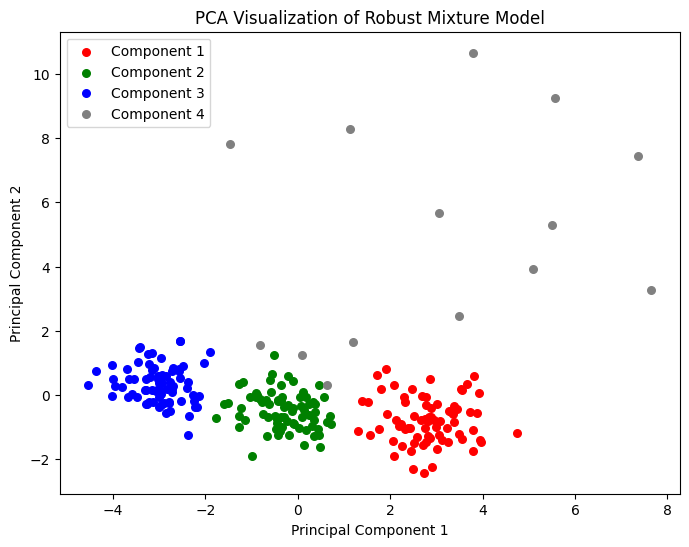

In [8]:

# Pre-requisites from Part 1 and Part 2


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

# --- Data Generation ---
# This function is provided for you. Do not modify it.
def generate_mars_data():
    """
    Generates a synthetic Mars rover dataset.

    - 3 true Gaussian clusters (rock types).
    - Feature at index 2 (silica) is biased upwards by +2.5 for
      readings taken at night (18:00-06:00).
    - ~5% of the data are random outliers from ChemCam "misfires".

    Returns:
        tuple: (data, timestamps)
               - data (np.ndarray): A (250, 5) numpy array.
               - timestamps (np.ndarray): A (250,) array of hours (0-23).
    """
    np.random.seed(42)

    # Define the true clusters
    means = [
        [5.1, 3.5, 4.4, 1.2, 1.1], # Igneous
        [8.5, 3.0, 8.5, 3.8, 2.3], # Sedimentary
        [6.8, 2.7, 6.1, 2.2, 1.5]  # Altered by Water
    ]
    covs = [
        np.diag([0.3, 0.4, 0.5, 0.3, 0.2]),
        np.diag([0.5, 0.3, 0.6, 0.4, 0.4]),
        np.diag([0.4, 0.3, 0.5, 0.3, 0.3])
    ]

    n_samples_per_cluster = 75

    # Generate true data
    true_data = np.vstack([np.random.multivariate_normal(m, c, n_samples_per_cluster) for m, c in zip(means, covs)])

    # Add outliers
    n_outliers = 15
    outliers = np.random.uniform(low=0, high=12, size=(n_outliers, 5))

    # Combine true data and outliers
    data = np.vstack([true_data, outliers])

    # Generate timestamps and apply conditional bias
    n_total = data.shape[0]
    timestamps = np.random.randint(0, 24, n_total)

    # Apply bias to silica reading (feature 2) for nighttime readings
    night_mask = (timestamps >= 18) | (timestamps < 6)
    data[night_mask, 2] += 2.5 # Additive bias

    # Shuffle everything
    shuffle_idx = np.random.permutation(n_total)
    data = data[shuffle_idx]
    timestamps = timestamps[shuffle_idx]

    return data, timestamps


raw_data, timestamps = generate_mars_data()
print(f"Generated raw data with shape: {raw_data.shape}")

print("\n--- Part 1 - Task 2: Correct for Systematic Bias (5 points) ---")

# Part 1 - Task 2: Correct for Systematic Bias (5 points)
#initialize corrected raw data as a copy of biased raw data
corrected_data = raw_data.copy()
#iterate raw data and timestamps to soustract the additive bias of 2.5 to feature 2 (silica) for nighttime readings
for i in range(len(corrected_data)):
    if (timestamps[i] >= 18) or (timestamps[i] < 6):
        corrected_data[i, 2] -= 2.5
        

print("\n--- Part 2: Robust Mixture Model from Scratch ---")

class RobustMixtureModel:
    def __init__(self, n_gaussians=3, n_iter=100):
        self.n_gaussians = n_gaussians
        self.n_components = n_gaussians + 1 # +1 for the uniform outlier model
        self.n_iter = n_iter


    def _e_step(self, X):
        # Calculate likelihoods for each component
        likelihoods = np.zeros((X.shape[0], self.n_components))

        # Gaussian components
        for k in range(self.n_gaussians):
            dist = multivariate_normal(self.means[k], self.covs[k], allow_singular=True)
            likelihoods[:, k] = dist.pdf(X)

        # Uniform component
        likelihoods[:, self.n_gaussians] = self.uniform_density

        # Calculate responsibilities
        numerator = likelihoods * self.weights
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        # Add a small epsilon to denominator to avoid division by zero
        responsibilities = numerator / (denominator + 1e-9)
        return responsibilities

    def _m_step(self, X, responsibilities):
        # Part 2 - Task 2: implementing the update step (15 points)
        # __code below__
        
        # Number of samples
        n_samples = X.shape[0]

        # Sum along the rows to get effective number of points for each component
        N_k = responsibilities.sum(axis=0)

        # update Gaussian components
        for k in range(self.n_gaussians):
            # Mean : sum(r_ik * ​x_i​​)/N_k​
            r_ik = responsibilities[:, k][:, np.newaxis] # shaped in (n_samples, 1) for matrix product with X(n_samples, n_features)
            self.means[k] = (r_ik * X).sum(axis=0) / (N_k[k] + 1e-9) # Adding a small epsilon to avoid division by zero

            # Covariance : sum(r_ik * (x_i - mean_k)(x_i - mean_k)^T)/N_k​
            r_ik = r_ik[:, np.newaxis] # Reshape in (n_samples, 1, 1) for matrix product with diff(n_samples, n_features)
            # diff = (x_i - mean_k)
            diff = X - self.means[k] # shaped in (n_samples, n_features)
            diff_outer_p = np.array([np.outer(row, row) for row in diff])
            self.covs[k] = (r_ik * diff_outer_p).sum(axis=0) / (N_k[k] + 1e-9) # Adding a small epsilon to avoid division by zero


        # Weights : N_k / n_samples
        self.weights = N_k / n_samples

        # Normalize weights to ensure sum(weights) = 1
        self.weights /= self.weights.sum()
          
          

    def fit(self, X):
        n_samples, n_features = X.shape

        # Part 2 - Task 3: performe the main training loop (10 points)

        # Initialize parameters
        # Gaussian params
        
        # pick n_gaussians random samples from X as initial means
        self.means = X[np.random.choice(n_samples, self.n_gaussians, replace=False)]
        
        # use identity matrices for initial covariances
        self.covs =  [np.eye(n_features) for _ in range(self.n_gaussians)]
        
        
        # All weights (Gaussians + Uniform)
        # w = 1 / n_components for all Gaussians and uniform
        self.weights = np.ones(self.n_components) / self.n_components

        # Uniform outlier model parameter
        # min and max of the data
        data_min = X.min(axis=0)
        data_max = X.max(axis=0)
        # p_i = 
        self.uniform_density =  1 / np.prod(data_max - data_min)


        # 2. Iterative loop
        for i in range(self.n_iter):
          # __TODO__: performe the main training loop
          # __code below__
            # compute responsibilities and update parameters
           responsibilities = self._e_step(X)
           self._m_step(X, responsibilities)



    def predict(self, X):
        responsibilities = self._e_step(X)
        return np.argmax(responsibilities, axis=1)


# Train your robust model
my_model = RobustMixtureModel(n_gaussians=3, n_iter=100)
my_model.fit(corrected_data)
my_model_labels = my_model.predict(corrected_data)
print("Custom robust mixture model trained.")



#--------------------------------------------------------------------------------------------

# --- Part 3: Visualization with PCA (5 Points) ---
print("\n--- Part 3: PCA Visualization ---")

# Task 1 : Apply PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(corrected_data) # shaped (n_samples, 2)


# Task 2 : Visualize Your Model’s Results
# Separate Gaussian clusters (0, 1, 2) and outliers (3)
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'gray']

for k in range(my_model.n_components):
    plt.scatter(
        X_pca[my_model_labels == k, 0],
        X_pca[my_model_labels == k, 1],
        s=30, c=colors[k], label=f'Component {k+1}'
    )

plt.title("PCA Visualization of Robust Mixture Model")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()





--- Part 4: Comparison and Discussion ---
scikit-learn GMM trained.
K-Means model trained.


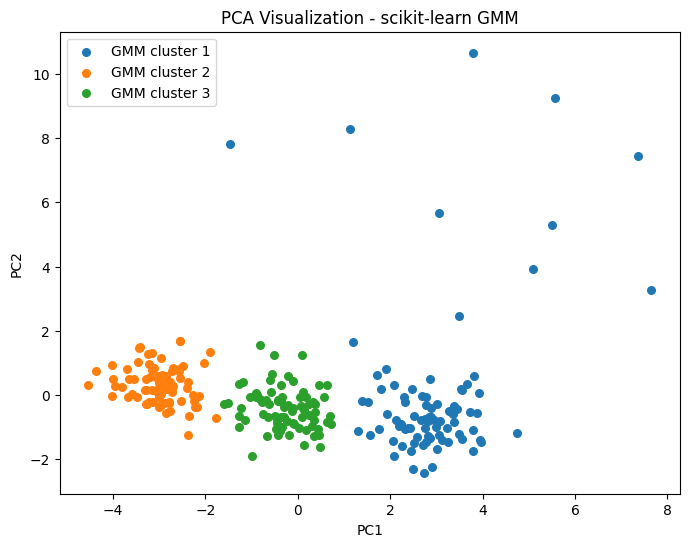

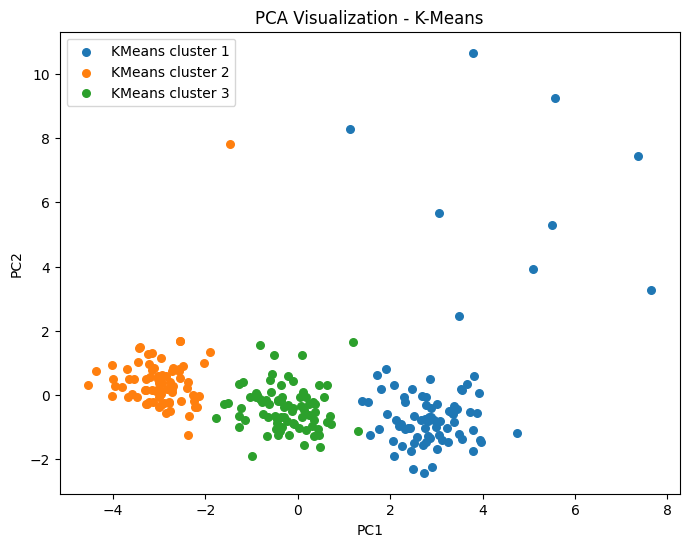

In [9]:


# --- Part 4: Comparison and Discussion (25 Points) ---
print("\n--- Part 4: Comparison and Discussion ---")

# Train scikit-learn GMM with 3 components

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42) # initialized without uniform component
gmm_labels = gmm.fit_predict(corrected_data) # shaped (n_samples,)
print("scikit-learn GMM trained.")


# Train KMeans with 3 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42) # initialized with 3 clusters
kmeans_labels = kmeans.fit_predict(corrected_data) # shaped (n_samples,)
print("K-Means model trained.")


# Visualize sklearn GMM results

# 2D PCA plot
plt.figure(figsize=(8, 6))
for k in range(3):
    plt.scatter(X_pca[gmm_labels == k, 0], X_pca[gmm_labels == k, 1], s=30, label=f'GMM cluster {k+1}')
plt.title("PCA Visualization - scikit-learn GMM")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.show()


# Visualize KMeans results

# 2D PCA plot
plt.figure(figsize=(8, 6))
for k in range(3):
    plt.scatter(X_pca[kmeans_labels == k, 0], X_pca[kmeans_labels == k, 1], s=30, label=f'KMeans cluster {k+1}')
plt.title("PCA Visualization - K-Means")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend()
plt.show()






# TODO: Write your answers to the discussion questions as comments here.
# 1. Compare the three PCA plots...
# 2. Discuss the advantages of explicitly modeling outliers...
# 3. What are the limitations of the uniform outlier model?...

Generated raw data with shape: (240, 5)

--- Part 1 - Task 2: Correct for Systematic Bias (5 points) ---

--- Part 2: Robust Mixture Model from Scratch ---
Custom robust mixture model trained.


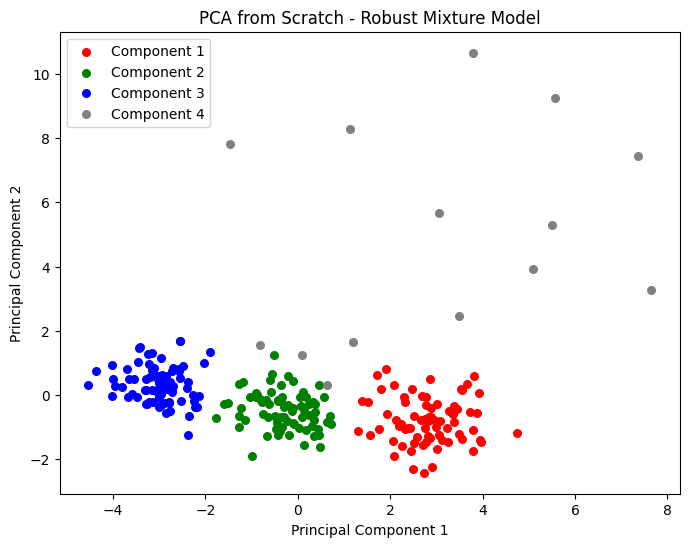

In [10]:
# --- Bonus part below


# Pre-requisites from Part 1 and Part 2


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

# --- Data Generation ---
# This function is provided for you. Do not modify it.
def generate_mars_data():
    """
    Generates a synthetic Mars rover dataset.

    - 3 true Gaussian clusters (rock types).
    - Feature at index 2 (silica) is biased upwards by +2.5 for
      readings taken at night (18:00-06:00).
    - ~5% of the data are random outliers from ChemCam "misfires".

    Returns:
        tuple: (data, timestamps)
               - data (np.ndarray): A (250, 5) numpy array.
               - timestamps (np.ndarray): A (250,) array of hours (0-23).
    """
    np.random.seed(42)

    # Define the true clusters
    means = [
        [5.1, 3.5, 4.4, 1.2, 1.1], # Igneous
        [8.5, 3.0, 8.5, 3.8, 2.3], # Sedimentary
        [6.8, 2.7, 6.1, 2.2, 1.5]  # Altered by Water
    ]
    covs = [
        np.diag([0.3, 0.4, 0.5, 0.3, 0.2]),
        np.diag([0.5, 0.3, 0.6, 0.4, 0.4]),
        np.diag([0.4, 0.3, 0.5, 0.3, 0.3])
    ]

    n_samples_per_cluster = 75

    # Generate true data
    true_data = np.vstack([np.random.multivariate_normal(m, c, n_samples_per_cluster) for m, c in zip(means, covs)])

    # Add outliers
    n_outliers = 15
    outliers = np.random.uniform(low=0, high=12, size=(n_outliers, 5))

    # Combine true data and outliers
    data = np.vstack([true_data, outliers])

    # Generate timestamps and apply conditional bias
    n_total = data.shape[0]
    timestamps = np.random.randint(0, 24, n_total)

    # Apply bias to silica reading (feature 2) for nighttime readings
    night_mask = (timestamps >= 18) | (timestamps < 6)
    data[night_mask, 2] += 2.5 # Additive bias

    # Shuffle everything
    shuffle_idx = np.random.permutation(n_total)
    data = data[shuffle_idx]
    timestamps = timestamps[shuffle_idx]

    return data, timestamps


raw_data, timestamps = generate_mars_data()
print(f"Generated raw data with shape: {raw_data.shape}")

print("\n--- Part 1 - Task 2: Correct for Systematic Bias (5 points) ---")

# Part 1 - Task 2: Correct for Systematic Bias (5 points)
#initialize corrected raw data as a copy of biased raw data
corrected_data = raw_data.copy()
#iterate raw data and timestamps to soustract the additive bias of 2.5 to feature 2 (silica) for nighttime readings
for i in range(len(corrected_data)):
    if (timestamps[i] >= 18) or (timestamps[i] < 6):
        corrected_data[i, 2] -= 2.5
        

print("\n--- Part 2: Robust Mixture Model from Scratch ---")

class RobustMixtureModel:
    def __init__(self, n_gaussians=3, n_iter=100):
        self.n_gaussians = n_gaussians
        self.n_components = n_gaussians + 1 # +1 for the uniform outlier model
        self.n_iter = n_iter


    def _e_step(self, X):
        # Calculate likelihoods for each component
        likelihoods = np.zeros((X.shape[0], self.n_components))

        # Gaussian components
        for k in range(self.n_gaussians):
            dist = multivariate_normal(self.means[k], self.covs[k], allow_singular=True)
            likelihoods[:, k] = dist.pdf(X)

        # Uniform component
        likelihoods[:, self.n_gaussians] = self.uniform_density

        # Calculate responsibilities
        numerator = likelihoods * self.weights
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        # Add a small epsilon to denominator to avoid division by zero
        responsibilities = numerator / (denominator + 1e-9)
        return responsibilities

    def _m_step(self, X, responsibilities):
        # Part 2 - Task 2: implementing the update step (15 points)
        # __code below__
        
        # Number of samples
        n_samples = X.shape[0]

        # Sum along the rows to get effective number of points for each component
        N_k = responsibilities.sum(axis=0)

        # update Gaussian components
        for k in range(self.n_gaussians):
            # Mean : sum(r_ik * ​x_i​​)/N_k​
            r_ik = responsibilities[:, k][:, np.newaxis] # shaped in (n_samples, 1) for matrix product with X(n_samples, n_features)
            self.means[k] = (r_ik * X).sum(axis=0) / (N_k[k] + 1e-9) # Adding a small epsilon to avoid division by zero

            # Covariance : sum(r_ik * (x_i - mean_k)(x_i - mean_k)^T)/N_k​
            r_ik = r_ik[:, np.newaxis] # Reshape in (n_samples, 1, 1) for matrix product with diff(n_samples, n_features)
            # diff = (x_i - mean_k)
            diff = X - self.means[k] # shaped in (n_samples, n_features)
            diff_outer_p = np.array([np.outer(row, row) for row in diff])
            self.covs[k] = (r_ik * diff_outer_p).sum(axis=0) / (N_k[k] + 1e-9) # Adding a small epsilon to avoid division by zero


        # Weights : N_k / n_samples
        self.weights = N_k / n_samples

        # Normalize weights to ensure sum(weights) = 1
        self.weights /= self.weights.sum()
          
          

    def fit(self, X):
        n_samples, n_features = X.shape

        # Part 2 - Task 3: performe the main training loop (10 points)

        # Initialize parameters
        # Gaussian params
        
        # pick n_gaussians random samples from X as initial means
        self.means = X[np.random.choice(n_samples, self.n_gaussians, replace=False)]
        
        # use identity matrices for initial covariances
        self.covs =  [np.eye(n_features) for _ in range(self.n_gaussians)]
        
        
        # All weights (Gaussians + Uniform)
        # w = 1 / n_components for all Gaussians and uniform
        self.weights = np.ones(self.n_components) / self.n_components

        # Uniform outlier model parameter
        # min and max of the data
        data_min = X.min(axis=0)
        data_max = X.max(axis=0)
        # p_i = 
        self.uniform_density =  1 / np.prod(data_max - data_min)


        # 2. Iterative loop
        for i in range(self.n_iter):
          # __TODO__: performe the main training loop
          # __code below__
            # compute responsibilities and update parameters
           responsibilities = self._e_step(X)
           self._m_step(X, responsibilities)



    def predict(self, X):
        responsibilities = self._e_step(X)
        return np.argmax(responsibilities, axis=1)


# Train your robust model
my_model = RobustMixtureModel(n_gaussians=3, n_iter=100)
my_model.fit(corrected_data)
my_model_labels = my_model.predict(corrected_data)
print("Custom robust mixture model trained.")


# PCA from scratch

# Center the data by subtracting the mean 
X = corrected_data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

#Covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Find the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by descending eigenvalue
sorted_indices = np.argsort(eigenvalues)[::-1]
top2_indices = sorted_indices[:2]

top2_eigenvectors = eigenvectors[:, top2_indices]

# project onto top 2 PCs
X_pca_manual = X_centered @ top2_eigenvectors

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'gray']

for k in range(my_model.n_components):
    plt.scatter(
        X_pca_manual[my_model_labels == k, 0],
        X_pca_manual[my_model_labels == k, 1],
        s=30, c=colors[k], label=f'Component {k+1}'
    )

plt.title("PCA from Scratch - Robust Mixture Model")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
